<a href="https://colab.research.google.com/github/dton24/Notes/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIS 4321
# Dr. Mohammad Salehan
## Clustering Assignment
In this assignment you will conduct clustering on a dataset. The data includes information about 21 pharmaceutical companies.

Enter your name below.

## Load required packages

In [ ]:
%matplotlib inline

from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

## Load Data

In [ ]:
import pandas as pd
df = pd.read_excel('Pharmaceuticals.xlsx', 'data')
df.shape

(21, 14)

## 1. Set the index
Set Symbol as row index for the dataframe.

In [ ]:
# Explore dataset attributes
df.head(5)

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
0,ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE
1,AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE
2,AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE
3,AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE
4,AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE


In [ ]:
# Set attribute "Symbol" as row index. This will be the unique identifier for each row.
df.set_index('Symbol', inplace = True)

## 2. Missing values
Examine the missing values and drop them if there is any.

In [ ]:
# Look for missing values by finding the sum of missing values in each column
df.isna().sum()

Name                     0
Market_Cap               0
Beta                     0
PE_Ratio                 0
ROE                      0
ROA                      0
Asset_Turnover           0
Leverage                 0
Rev_Growth               0
Net_Profit_Margin        0
Median_Recommendation    0
Location                 0
Exchange                 0
dtype: int64

As we can see, there are no missing values in the dataframe

## 3. Create the numeric dataframe
Create a new dataframe named numeric_df which only contains numeric values. We won't use the categorical values in this  assignment.

In [ ]:
# Create a new variable called numeric columns. This shows me all of the columns that are numeric.
numeric_columns = df.select_dtypes(include = ['number']).columns

In [ ]:
# Went back to make sure all of these columns were NOT categorical variables.
# Concluded that these are the attributes I will be using in my new dataframe, "numeric_df"
numeric_columns

Index(['Market_Cap', 'Beta', 'PE_Ratio', 'ROE', 'ROA', 'Asset_Turnover',
       'Leverage', 'Rev_Growth', 'Net_Profit_Margin'],
      dtype='object')

In [ ]:
numeric_df = df[['Market_Cap', 'Beta', 'PE_Ratio', 'ROE', 'ROA', 'Asset_Turnover',
       'Leverage', 'Rev_Growth', 'Net_Profit_Margin']]

In [ ]:
numeric_df

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
Symbol,,,,,,,,,
ABT,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1
AGN,7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5
AHM,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2
AZN,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0
AVE,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9
BAY,16.90,1.11,27.9,3.9,1.4,0.6,0.00,-3.17,2.6
BMY,51.33,0.50,13.9,34.8,15.1,0.9,0.57,2.70,20.6
CHTT,0.41,0.85,26.0,24.1,4.3,0.6,3.51,6.38,7.5
ELN,0.78,1.08,3.6,15.1,5.1,0.3,1.07,34.21,13.3


## 4. Convert all values to float
use numeric_df.

In [ ]:
numeric_df = numeric_df.astype(float)

In [ ]:
numeric_df.dtypes

Market_Cap           float64
Beta                 float64
PE_Ratio             float64
ROE                  float64
ROA                  float64
Asset_Turnover       float64
Leverage             float64
Rev_Growth           float64
Net_Profit_Margin    float64
dtype: object

## 5. Normalize numeric_df.

In [ ]:
# Save symbols index into "symbols variable, so we can make it the index after we create our new, normalized dataframe
symbols = numeric_df.index
#Import StandardScaler as a tool to normalize our data
from sklearn.preprocessing import StandardScaler
#Intiate model
scaler = StandardScaler()
#Normalize the data
numeric_df_norm = scaler.fit_transform(numeric_df)

In [ ]:
# Create a new data frame with normalized values
numeric_df_norm = pd.DataFrame(numeric_df_norm, columns =['Market_Cap', 'Beta', 'PE_Ratio', 'ROE', 'ROA', 'Asset_Turnover',
       'Leverage', 'Rev_Growth', 'Net_Profit_Margin'], index = symbols)

In [ ]:
# Check to see if numeric_df_norm is a dataframe with normalized values, along with 'Symbol' as its index
numeric_df_norm.head()

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
Symbol,,,,,,,,,
ABT,0.188642,-0.821041,-0.047867,0.041080,0.247579,-5.247542e-16,-0.217336,-0.540801,0.063205
AGN,-0.875518,-0.461835,3.583430,-0.875950,-0.965557,9.453132e-01,0.018736,-0.390551,-1.592035
AHM,-0.897899,-0.262277,-0.299168,-0.740094,-0.522666,9.453132e-01,-0.414062,-0.586247,-0.701953
AZN,0.174479,-0.022807,-0.248907,0.109009,0.940799,9.453132e-01,-0.768169,0.151089,0.359900
AVE,-0.183447,-0.821041,-0.336863,-0.271389,-0.580435,-4.726566e-01,-0.322256,1.246425,-0.436490


Above, shows the new normalized dataset

#### Data Exploration of Euclidean Distance between each company

In [ ]:
# Calculate Euclidean Distance, which shows the distance between each record
d = pairwise.pairwise_distances(numeric_df_norm, metric = 'euclidean')

#Turn into dataframe and show distance between each symbol
pd.DataFrame(d, columns = numeric_df_norm.index, index = numeric_df_norm.index)

Symbol,ABT,AGN,AHM,AZN,AVE,BAY,BMY,CHTT,ELN,LLY,...,IVX,JNJ,MRX,MRK,NVS,PFE,PHA,SGP,WPI,WYE
Symbol,,,,,,,,,,,,,,,,,,,,,
ABT,0.000000,4.524618,2.068648,1.710771,2.164139e+00,4.806057,1.850131,5.144714,5.022175,1.457814,...,2.689547,2.391509,4.017109,2.746934,1.970213,3.983231,2.980819,1.345014,2.953797,3.113586
AGN,4.524618,0.000000,4.043186,5.030808,4.757351e+00,4.973768,5.553321,5.750821,6.860601,5.267192,...,4.580415,5.449269,5.614386,5.578355,5.603897,7.077392,2.426388,4.842078,5.130736,6.605654
AHM,2.068648,4.043186,0.000000,2.422635,2.548593e+00,3.726153,2.665217,4.877898,4.811808,3.318325,...,2.373755,3.682513,4.222306,3.445005,3.414021,5.398973,2.997876,1.746806,3.016647,4.288958
AZN,1.710771,5.030808,2.422635,0.000000,2.697286e+00,5.190658,1.611417,5.860410,5.097367,2.465366,...,3.363249,2.006687,4.374660,1.905195,3.131669,3.186200,3.807570,1.107202,3.498439,3.407076
AVE,2.164139,4.757351,2.548593,2.697286,2.980232e-08,4.882317,3.484580,5.222098,3.841354,2.982647,...,2.445794,3.730682,2.999547,3.558161,3.413135,4.606252,2.785574,2.525725,1.328568,4.359629
BAY,4.806057,4.973768,3.726153,5.190658,4.882317e+00,0.000000,5.403241,5.092159,4.722471,5.947760,...,3.748346,5.865665,4.968175,6.064634,5.462654,7.340908,4.053618,4.535728,5.180621,6.101423
BMY,1.850131,5.553321,2.665217,1.611417,3.484580e+00,5.403241,0.000000,5.417973,5.510904,2.243167,...,3.360926,2.573326,4.851692,2.492347,2.936906,3.757223,4.517516,1.514943,4.217721,2.325861
CHTT,5.144714,5.750821,4.877898,5.860410,5.222098e+00,5.092159,5.417973,0.000000,4.791070,5.797520,...,3.024398,6.466064,4.904409,6.252219,6.213482,7.357574,5.124202,5.478546,5.677114,5.254617
ELN,5.022175,6.860601,4.811808,5.097367,3.841354e+00,4.722471,5.510904,4.791070,0.000000,5.691389,...,3.192215,6.220445,2.448738,6.068231,5.873882,6.274344,5.131387,4.780829,3.849202,5.443646


## 6. KMeans clustering
Conduct KMeans clustering for k values in 1-10 range. Then draw the elbow chart.

In [ ]:
# Create an empty list to store the inertia values (within-cluster sum of squares) for each k
inertia_values = []

# Loop through k values from 1 to 10. This means we are creating 1 cluster, then 2 clusters, all the way up to 10.
for k in range(1, 11):
    # Create a K-Means model with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit the model to the normalized data
    kmeans.fit(numeric_df_norm)

    # Append the inertia value to the list. Inertia is the sum squared of distances of all data points from their centroid in their respective clusters.
    inertia_values.append(kmeans.inertia_)


What happens when we fit a kmeans model?
1. Initial **centroids are chosen** (often using the 'k-means++' method).
2. **Data points are assigned** to the nearest centroid.
3. **Centroids are recalculated** based on the mean of their assigned points.
4. Steps 2 and 3 are repeated until centroids stabilize or a set number of iterations is reached. The goal is to minimize the sum of squared distances between points and their assigned centroids.

When we fit the kmeans model, it calculates:
1. cluster_centers_: Contains the coordinates of the cluster centroids.
2. labels_: Contains the cluster labels for each data point.
3. inertia_: The sum of squared distances of all the data points in the cluster to its centroid

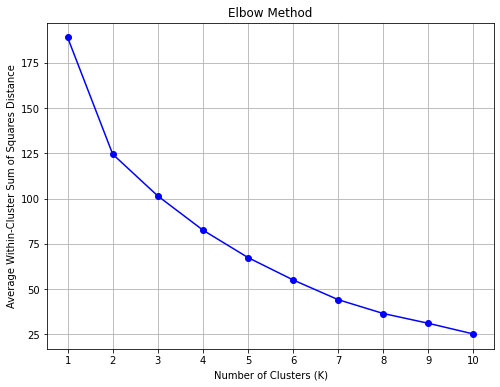

In [ ]:
# Create an elbow chart to visualize the inertia values for different k values
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Within-Cluster Sum of Squares Distance')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Chart above shows the elbow method. It gives the average cluster sum of squares for each number of clusters. As you can see, the less amount of clusters there are, the more distance there is between all of the data points within those clusters, vice versa. We can find optimal K by looking for the point that turns like an elbow, or where the slope between each K begins to plateau.

## 7. Choose the best K.
Based on the elbow chart you drew above, write below what value of k you think is the best and why.

I would choose k = 3 because this is the point where the line curves in like an elbow. After 3, you can begin seeing a slow decline for every increase in 'k'.

#### After finding my optimal K, I now want to find the the companies that are in each cluster

In [ ]:
# Fit the KMeans Model. What this does is calculate the centroids for each cluster (3 clusters), as well as put each data point into the centroid it is closest into.
kmeans = KMeans(n_clusters=3, random_state=0).fit(numeric_df_norm)

# Create a pandas Series that associates each company with its cluster
memb = pd.Series(kmeans.labels_, index=numeric_df_norm.index)

# Display the companies (or indices) in each cluster
for cluster, indices in memb.groupby(memb):
    print(f"Cluster {cluster}: {', '.join(map(str, indices.index))}")

Cluster 0: AVE, CHTT, ELN, IVX, MRX, WPI
Cluster 1: ABT, AZN, BMY, LLY, GSK, JNJ, MRK, NVS, PFE, SGP, WYE
Cluster 2: AGN, AHM, BAY, PHA


#### Create a profile plot to compare each cluster's attribute values

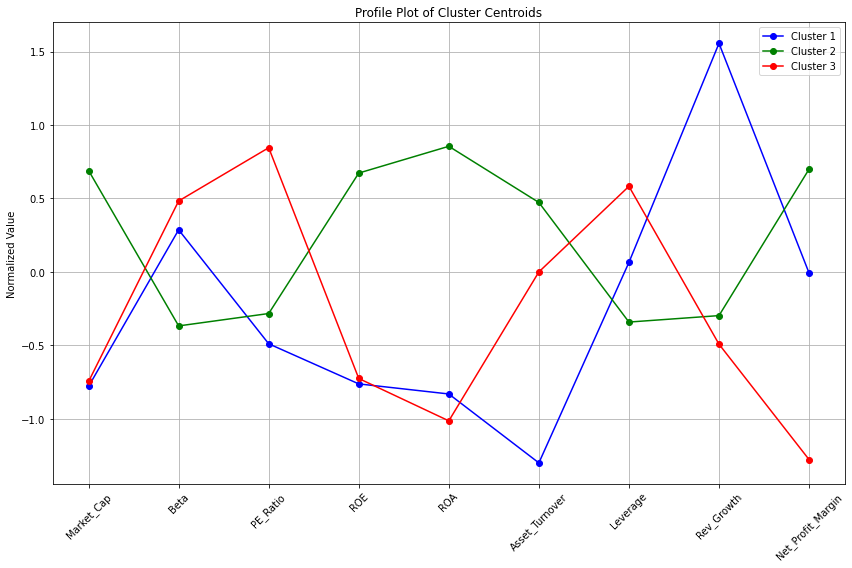

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# Initiate model
kmeans = KMeans(n_clusters=3, random_state=42)

#Create variable clusters and fit data and predict cluster assignments for each data point
clusters = kmeans.fit_predict(numeric_df_norm)

# Create variable centroids, which will hold the the centroids of each cluster
centroids = kmeans.cluster_centers_

# Convert centroids to DataFrame for easier plotting
centroids_df = pd.DataFrame(centroids, columns=numeric_df_norm.columns)

# Plotting
plt.figure(figsize=(12, 8))
colors = ['b', 'g', 'r']

# Plot centroids (mean values for each feature in the clusters)
for index, color in enumerate(colors):
    plt.plot(centroids_df.columns, centroids_df.iloc[index], color=color, marker='o', label=f'Cluster {index+1}')

plt.xticks(rotation=45)
plt.ylabel('Normalized Value')
plt.title('Profile Plot of Cluster Centroids')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 8.Hierarchical clustering Single linkage
Conduct heirarchical clustering using single linkage and draw a dendogram. Draw the horizontal line in a way that it gives you the same number of clusters that you chose for KMeans.

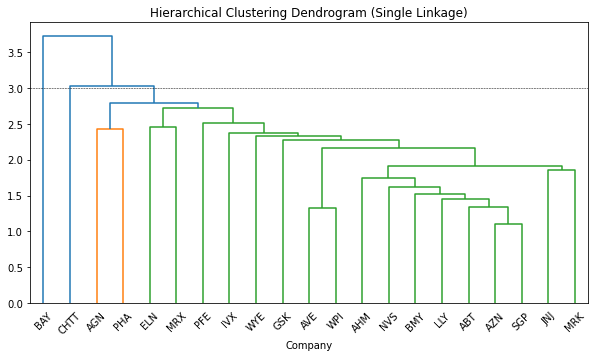

In [ ]:
Z = linkage(numeric_df_norm, method = 'single')

fig = plt.figure(figsize = (10,6))
fig.subplots_adjust(bottom = 0.23)
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)')
plt.xlabel('Company')
dendrogram(Z, labels = numeric_df_norm.index, color_threshold = 2.75)
plt.axhline(y = 3, color = 'black', linewidth = 0.5, linestyle = 'dashed')
plt.show()

There are 3 clusters, as shown by the 3 different colors, as well as the horizontal line passing through 3 vertical lines.

## 9.Hierarchical clustering Average linkage
Conduct heirarchical clustering using average linkage and draw a dendogram. Draw the horizontal line in a way that it gives you the same number of clusters that you chose for KMeans.

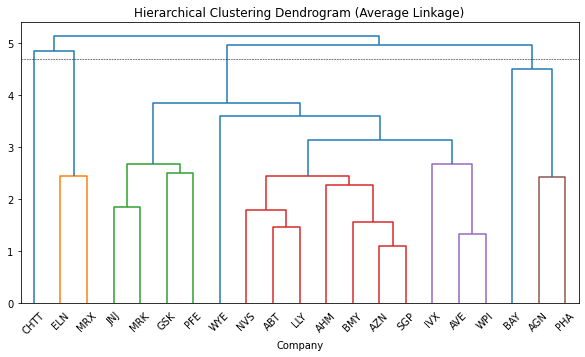

In [ ]:
Z = linkage(numeric_df_norm, method = 'average')

fig = plt.figure(figsize = (10,6))
fig.subplots_adjust(bottom = 0.23)
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.xlabel('Company')
dendrogram(Z, labels = numeric_df_norm.index, color_threshold = 2.75)
plt.axhline(y = 4.7, color = 'black', linewidth = 0.5, linestyle = 'dashed')
plt.show()

## 10. Cluster members: Single
Enter code that displays cluster members based on single method. For K, use any value that makes more sense to you based on the dendogram.

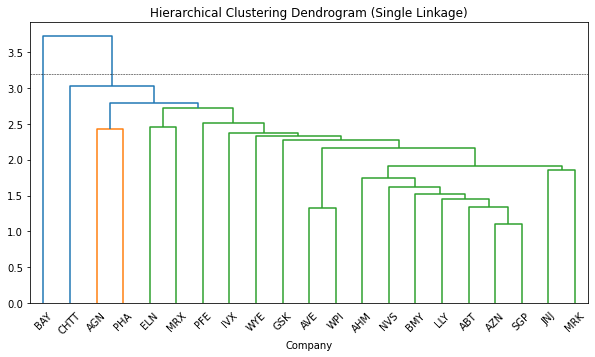

In [ ]:
Z = linkage(numeric_df_norm, method = 'single')
# Show y = 3.2 (5 clusters)
fig = plt.figure(figsize = (10,6))
fig.subplots_adjust(bottom = 0.23)
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)')
plt.xlabel('Company')
dendrogram(Z, labels = numeric_df_norm.index, color_threshold = 2.75)
plt.axhline(y = 3.2, color = 'black', linewidth = 0.5, linestyle = 'dashed')
plt.show()

As you can see above, I chose to put my y at 3.5 is because it shows all of the other clusters are relatively close to each other vertically. This means that they are similar to each other. However, it needs 2 clusters because BAY had a high vertical differnce between the rest.

In [ ]:
# Extract companies in each cluster
memb = fcluster(linkage(numeric_df_norm, 'single'), 2, criterion = 'maxclust')
memb = pd.Series(memb, index = numeric_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ',', '.join(item.index))

1 :  ABT, AGN, AHM, AZN, AVE, BMY, CHTT, ELN, LLY, GSK, IVX, JNJ, MRX, MRK, NVS, PFE, PHA, SGP, WPI, WYE
2 :  BAY


## 11. Cluster members: Average
Enter code that displays cluster members based on average method. For K, use any value that makes more sense to you based on the dendogram.

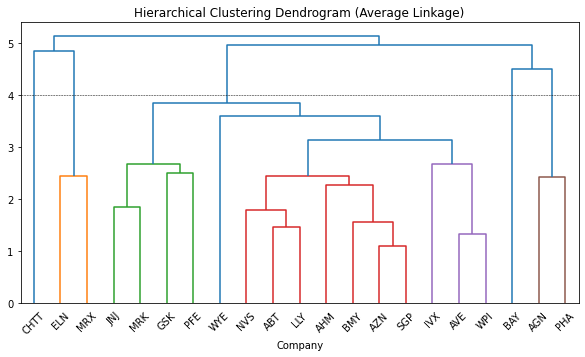

In [ ]:
Z = linkage(numeric_df_norm, method = 'average')

fig = plt.figure(figsize = (10,6))
fig.subplots_adjust(bottom = 0.23)
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.xlabel('Company')
dendrogram(Z, labels = numeric_df_norm.index, color_threshold = 2.75)
plt.axhline(y = 4, color = 'black', linewidth = 0.5, linestyle = 'dashed')
plt.show()

As you can see above, I chose y =4 (5 clusters) due to the vertical difference between certain clusters. If I were to go up more and have 3 clusters, a lot of companies with strong differences will be clustered together. If I chose more clusters, I will be creating clusters where there are strong similarities of different companies in different clusters. This is because the vertical difference is relatively small.

In [ ]:
# Extract companies in each cluster
memb = fcluster(linkage(numeric_df_norm, 'average'), 5, criterion = 'maxclust')
memb = pd.Series(memb, index = numeric_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ',', '.join(item.index))

1 :  ELN, MRX
2 :  CHTT
3 :  ABT, AHM, AZN, AVE, BMY, LLY, GSK, IVX, JNJ, MRK, NVS, PFE, SGP, WPI, WYE
4 :  AGN, PHA
5 :  BAY


## 12. Interpretation
Based on the dendograms, explain which model (single or average) is the best. Justify your selection.

## 13. Visualize the clusters
Draw heatmaps for the best model you selected in the previous step.

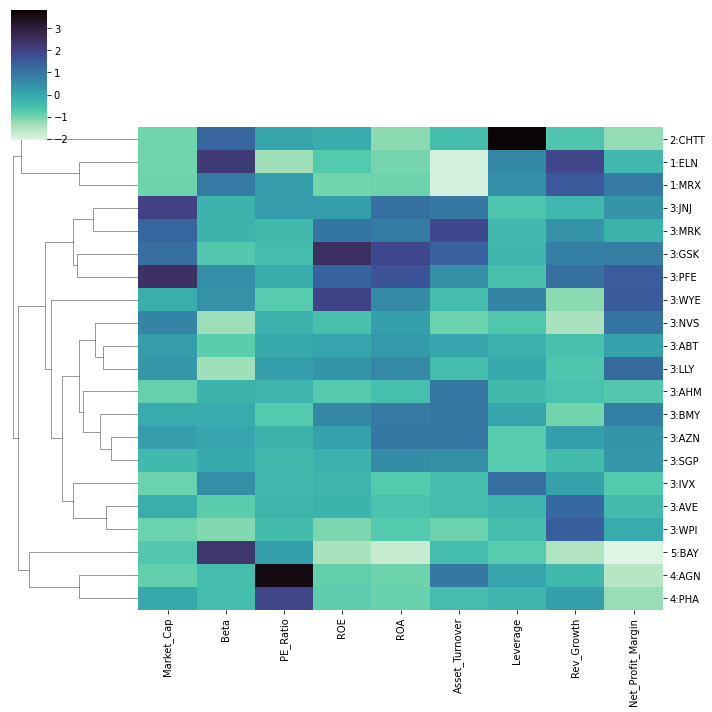

In [ ]:
numeric_df_norm.index = ['{}:{}'.format(cluster, state) for cluster, state in zip(memb, numeric_df_norm.index)]
sns.clustermap(numeric_df_norm, method = 'average', col_cluster = False, cmap = "mako_r")

## 14.  Label each cluster in the best model.